In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (12, 10)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

sns.set()

In [18]:
dataset = 'img'
width = 64
d_pca = 100
k = 20

height = width
result_filepath = f'result/{dataset}_{width}_{d_pca}_{k}.csv'

df = pd.read_csv(result_filepath, header=None)

In [26]:
pca_elapsed, pca_error = df.iloc[0, 1:]

n_component_lst = df.iloc[1:, 0]
elapsed_lst = df.iloc[1:, 1]
error_lst = df.iloc[1:, 2]

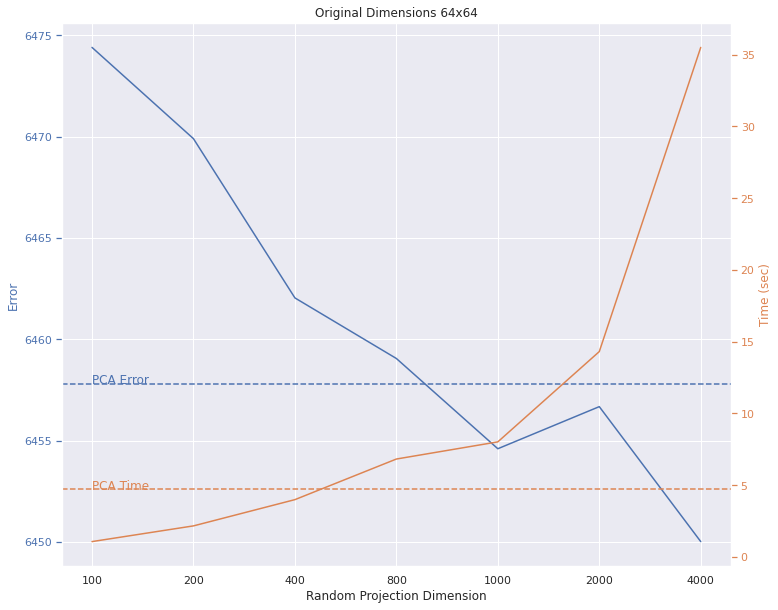

In [29]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

# Error plot
ax_left.plot(n_component_lst, error_lst, color=color_cycle[0])
ax_left.set_ylabel('Error')
ax_left.set_xlabel('Random Projection Dimension')
ax_left.yaxis.label.set_color(color_cycle[0])
ax_left.tick_params(axis='y', colors=color_cycle[0])
ax_left.axhline(y=pca_error, color=color_cycle[0], linestyle='--')
ax_left.text(x=0, y=pca_error, s='PCA Error', color=color_cycle[0])

# Time plot
ax_right.plot(n_component_lst, elapsed_lst, color=color_cycle[1])
ax_right.set_ylabel('Time (sec)')
ax_right.grid(False)
ax_right.yaxis.label.set_color(color_cycle[1])
ax_right.tick_params(axis='y', colors=color_cycle[1])
ax_right.axhline(y=pca_elapsed, color=color_cycle[1], linestyle='--')
ax_right.text(x=0, y=pca_elapsed, s='PCA Time', color=color_cycle[1])

plt.title(f'Original Dimensions {width}x{height}')
plt.show()